In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [17]:
from tensorflow import keras

In [2]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

In [3]:
tokenizer = Tokenizer()
data = open('y_u_no.txt' , encoding="utf8").read()
corpus = data.lower().split("\n")
s =  '\ny_u_no.txt '
s = s.join(corpus)
s = '\ny_u_no.txt' + s
corpus = s.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [4]:
print(total_words)

2955


In [5]:
print(corpus)

['', 'y_u_no.txtpublic breastfeeding women y u no wink back?', 'y_u_no.txt textbooks y u no have ctrl-f', 'y_u_no.txt america! we help you fight sopa! y u no help us back?', 'y_u_no.txt neil degrasse tyson y u no run for president', 'y_u_no.txt anus y u no like spicy food as much as mouth', 'y_u_no.txt head voice y u no like real voice', 'y_u_no.txt brain y u no stop clicking /r/wtf links?', 'y_u_no.txt teacher y u no full screen the video', 'y_u_no.txt shampoo bottle y u no have internet', 'y_u_no.txt seasons y u no in order this year', 'y_u_no.txt teacher y u no leave the kids alone', 'y_u_no.txt reddit y u no have good search ', 'y_u_no.txt people y u no find out about sopa until now', 'y_u_no.txt male porn stars y u no stfu during porn?', 'y_u_no.txt whoever made this template y u no fill the space between my arms blue?', 'y_u_no.txt reddit y u no use me no more', 'y_u_no.txt parent who says kid is 36 months old y u no say 3 years old', 'y_u_no.txt people y u no remember me', 'y_u_

In [6]:
print(tokenizer.word_index)

{'u': 1, 'y': 2, 'no': 3, 'txt': 4, 'me': 5, 'have': 6, 'in': 7, 'to': 8, 'so': 9, 'the': 10, 'on': 11, 'i': 12, 'you': 13, 'my': 14, 'of': 15, 'make': 16, 'let': 17, 'like': 18, 'work': 19, 'your': 20, 'stop': 21, 'people': 22, 'use': 23, 'and': 24, 'back': 25, 'a': 26, 'for': 27, 'when': 28, 'give': 29, 'get': 30, 'at': 31, 'up': 32, 'reddit': 33, 'with': 34, 'facebook': 35, 'girls': 36, 'all': 37, 'go': 38, 'good': 39, 'text': 40, 'it': 41, 'come': 42, 'girl': 43, 'r': 44, 'play': 45, 'more': 46, 'that': 47, 'not': 48, 'hot': 49, 'do': 50, 'post': 51, 'why': 52, 'porn': 53, 'fuck': 54, 'be': 55, 'want': 56, 'memes': 57, '3': 58, 'sleep': 59, 'tell': 60, 'show': 61, 'yet': 62, 'stay': 63, 'anymore': 64, 'us': 65, 'leave': 66, 'out': 67, 'funny': 68, 'spam': 69, 'meme': 70, 'take': 71, 'after': 72, 'put': 73, 'women': 74, 'alone': 75, 'right': 76, 'hey': 77, 'rage': 78, 'here': 79, 'much': 80, 'time': 81, 'guy': 82, 'fucking': 83, 'sex': 84, 'yourself': 85, 'before': 86, 'call': 87, '

In [7]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    # print(line)
    # print(token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        # print(line)
        # print(n_gram_sequence)
        input_sequences.append(n_gram_sequence)

In [8]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
print(input_sequences)

[[   0    0    0 ...    0    2    1]
 [   0    0    0 ...    2    1    3]
 [   0    0    0 ...    1    3 1009]
 ...
 [   0    0    0 ...    0    2    1]
 [   0    0    0 ...    2    1    3]
 [   0    0    0 ...    1    3    4]]


In [9]:
print(max_sequence_len)

50


In [10]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [11]:
print(predictors.shape)
print(label.shape)

(16836, 49)
(16836, 2955)


In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 49, 100)           295500    
_________________________________________________________________
bidirectional (Bidirectional (None, 49, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 49, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1477)              149177    
_________________________________________________________________
dense_1 (Dense)              (None, 2955)              4367490   
Total params: 5,273,767
Trainable params: 5,273,767
Non-trainable params: 0
______________________________________________

In [14]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
527/527 [==============================] - 18s 18ms/step - loss: 4.3447 - accuracy: 0.4426
Epoch 2/100
527/527 [==============================] - 10s 18ms/step - loss: 3.5469 - accuracy: 0.52190s - loss: 3.5
Epoch 3/100
527/527 [==============================] - 10s 18ms/step - loss: 3.3894 - accuracy: 0.5278
Epoch 4/100
527/527 [==============================] - 10s 20ms/step - loss: 3.2839 - accuracy: 0.5296
Epoch 5/100
527/527 [==============================] - 10s 18ms/step - loss: 3.2061 - accuracy: 0.5303
Epoch 6/100
527/527 [==============================] - 10s 19ms/step - loss: 3.1478 - accuracy: 0.5314
Epoch 7/100
527/527 [==============================] - 10s 19ms/step - loss: 3.0967 - accuracy: 0.5319
Epoch 8/100
527/527 [==============================] - 9s 18ms/step - loss: 3.0571 - accuracy: 0.5339
Epoch 9/100
527/527 [==============================] - 9s 18ms/step - loss: 3.0172 - accuracy: 0.5344
Epoch 10/100
527/527 [==============================] - 10s 1

In [15]:
model.save("b_v2")

INFO:tensorflow:Assets written to: b_v2\assets


INFO:tensorflow:Assets written to: b_v2\assets


In [18]:
model2 = keras.models.load_model("b_v2")

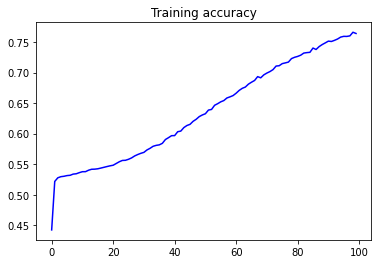

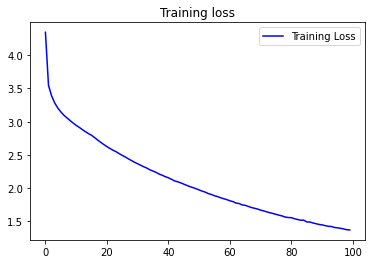

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [27]:
seed_text = "flavor"
next_words = 20

In [28]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)
length = len(seed_text)//2
toptext = seed_text[:length]
bottomtext = seed_text[length:]

flavor u no txt y u no talk 2 me no more first years of spot through morning shows truck morning


In [43]:
print(len(seed_text))

149


In [35]:
i = 0
seed_new = seed_text.split(" ")
for word in seed_new:
    if i <= 10:
        print(word)
        toptext += word + " "
    else:
        bottomtext += word + " "

lived
by
the
crap
checkpoint
checkpoint
checkpoint
checkpoint
longer
longer
debate
debate
sopa
e
sopa
mission
mission
5000
open
open
flag
who's
dress


In [33]:
print(seed_text)

lived by the crap checkpoint checkpoint checkpoint checkpoint longer longer debate debate sopa e sopa mission mission 5000 open open flag who's dress


In [37]:
# W,H=(298,298)
# img = Image.open("philosoraptor_format.jpg")
# draw = ImageDraw.Draw(img)
# # toptext = "TOP TEXT"
# # bottomtext = "BOTTOM TEXT"
# w1, h1 = draw.textsize(toptext)
# w2, h2 = draw.textsize(bottomtext)
# arial = ImageFont.truetype("arial.ttf", 16)

# draw.text(((W-w1)/2, 0),toptext,(255,255,255),font=arial)
# draw.text(((W-w2)/2, (H-h2)),bottomtext,(255,255,255),font=arial)
# img.save('philosoraptor_output.jpg')

In [44]:
import textwrap

W,H=(298,298)
img = Image.open("philosoraptor_format.jpg")
draw = ImageDraw.Draw(img)

font = ImageFont.truetype("arial.ttf", 24)


lines = textwrap.wrap(toptext, width=25)
y_text =0
for line in lines:
    width, height = font.getsize(line)
    draw.text(((W - width) / 2, y_text), line, font=font, fill=(255,255,255))
    y_text += height

w2, h2 = font.getsize(bottomtext)

lines2 = textwrap.wrap(bottomtext, width=25)
width2,height2 = font.getsize(lines[0])
y_text2 = (len(lines2)*height2)

for line in lines2:
    width, height = font.getsize(line)
    draw.text(((W - width) / 2, (H-y_text2)), line, font=font, fill=(255,255,255))
    y_text2 -= height2

img.save('philosoraptor_output.jpg')